In [51]:
import pandas as pd
import numpy as np
import json
import aubio
import zipfile
import librosa
import matplotlib.pyplot as plt

In [2]:
with open('Normal.dat') as json_file:
    data = json.load(json_file)

In [4]:
data.keys()

dict_keys(['_version', '_BPMChanges', '_events', '_notes', '_obstacles', '_bookmarks'])

In [24]:
data['_notes'] #'_notes' are the blocks that must be hit or the bombs that must be avoided. Each dictionary in this 
#list details the time ('_time'), the block position ('_lineIndex' - left to right - and '_lineLayer' - up and down), 
#the color or handedness of the block ('_type'), and which direction the block must be hit ('_cutDirection')

[{'_time': 22,
  '_lineIndex': 2,
  '_lineLayer': 0,
  '_type': 1,
  '_cutDirection': 1},
 {'_time': 24,
  '_lineIndex': 1,
  '_lineLayer': 0,
  '_type': 0,
  '_cutDirection': 2},
 {'_time': 26,
  '_lineIndex': 3,
  '_lineLayer': 0,
  '_type': 1,
  '_cutDirection': 7},
 {'_time': 28,
  '_lineIndex': 2,
  '_lineLayer': 0,
  '_type': 1,
  '_cutDirection': 2},
 {'_time': 30,
  '_lineIndex': 1,
  '_lineLayer': 0,
  '_type': 0,
  '_cutDirection': 3},
 {'_time': 32,
  '_lineIndex': 0,
  '_lineLayer': 0,
  '_type': 0,
  '_cutDirection': 1},
 {'_time': 32,
  '_lineIndex': 3,
  '_lineLayer': 0,
  '_type': 1,
  '_cutDirection': 1},
 {'_time': 34,
  '_lineIndex': 2,
  '_lineLayer': 0,
  '_type': 1,
  '_cutDirection': 0},
 {'_time': 35,
  '_lineIndex': 2,
  '_lineLayer': 0,
  '_type': 1,
  '_cutDirection': 1},
 {'_time': 36,
  '_lineIndex': 1,
  '_lineLayer': 0,
  '_type': 0,
  '_cutDirection': 0},
 {'_time': 37,
  '_lineIndex': 1,
  '_lineLayer': 0,
  '_type': 0,
  '_cutDirection': 1},
 {'_time':

In [5]:
data['_events'] #'_events' describe the lighting of the level?

[{'_time': 0, '_type': 9, '_value': 0},
 {'_time': 0, '_type': 8, '_value': 0},
 {'_time': 0, '_type': 4, '_value': 0},
 {'_time': 0, '_type': 3, '_value': 0},
 {'_time': 0, '_type': 2, '_value': 0},
 {'_time': 0, '_type': 1, '_value': 0},
 {'_time': 0, '_type': 12, '_value': 1},
 {'_time': 0, '_type': 0, '_value': 0},
 {'_time': 0, '_type': 13, '_value': 1},
 {'_time': 4, '_type': 3, '_value': 3},
 {'_time': 4.125, '_type': 3, '_value': 0},
 {'_time': 4.25, '_type': 3, '_value': 3},
 {'_time': 4.375, '_type': 3, '_value': 0},
 {'_time': 4.5, '_type': 3, '_value': 3},
 {'_time': 5, '_type': 2, '_value': 3},
 {'_time': 5.125, '_type': 2, '_value': 0},
 {'_time': 5.25, '_type': 2, '_value': 3},
 {'_time': 5.375, '_type': 2, '_value': 0},
 {'_time': 5.5, '_type': 2, '_value': 3},
 {'_time': 6.5, '_type': 3, '_value': 3},
 {'_time': 6.75, '_type': 3, '_value': 0},
 {'_time': 7, '_type': 2, '_value': 3},
 {'_time': 7.25, '_type': 2, '_value': 0},
 {'_time': 8, '_type': 2, '_value': 2},
 {'_

In [6]:
data['_obstacles'] #'_obstacles' describe the walls that appear during the level. '_lineIndex' seems to be the 
#horizontal position (always 0 for a horizontal wall), '_type' describes the orientation of the wall, 0 for vertical 
#and 1 for horizontal, '_duration' describes how long the wall remains an obstacle, and '_width' describes the width
#of the walls (generally 4 for a horizontal wall)

[{'_time': 154, '_lineIndex': 2, '_type': 0, '_duration': 1, '_width': 2},
 {'_time': 162, '_lineIndex': 0, '_type': 0, '_duration': 0.25, '_width': 2},
 {'_time': 197.5, '_lineIndex': 0, '_type': 0, '_duration': 0.5, '_width': 2},
 {'_time': 199.5, '_lineIndex': 2, '_type': 0, '_duration': 0.5, '_width': 2},
 {'_time': 245, '_lineIndex': 0, '_type': 1, '_duration': 0.25, '_width': 4},
 {'_time': 317, '_lineIndex': 3, '_type': 0, '_duration': 1, '_width': 1},
 {'_time': 322, '_lineIndex': 0, '_type': 0, '_duration': 1, '_width': 1},
 {'_time': 326, '_lineIndex': 2, '_type': 0, '_duration': 0.25, '_width': 2},
 {'_time': 362, '_lineIndex': 2, '_type': 0, '_duration': 2, '_width': 2},
 {'_time': 370, '_lineIndex': 0, '_type': 0, '_duration': 1, '_width': 2},
 {'_time': 410, '_lineIndex': 0, '_type': 1, '_duration': 0.25, '_width': 4},
 {'_time': 413, '_lineIndex': 0, '_type': 1, '_duration': 0.25, '_width': 4},
 {'_time': 417, '_lineIndex': 0, '_type': 0, '_duration': 0.25, '_width': 1},

In [7]:
with open('info.dat') as info_file:
    info = json.load(info_file)

In [9]:
info

{'_version': '2.0.0',
 '_songName': 'Mr. Blue Sky',
 '_songSubName': '',
 '_songAuthorName': 'Electric Light Orchestra',
 '_levelAuthorName': 'GreatYazer',
 '_beatsPerMinute': 174,
 '_songTimeOffset': 0,
 '_shuffle': 0,
 '_shufflePeriod': 0.5,
 '_previewStartTime': 12,
 '_previewDuration': 10,
 '_songFilename': 'song.egg',
 '_coverImageFilename': 'cover.jpg',
 '_environmentName': 'DefaultEnvironment',
 '_customData': {'_contributors': [],
  '_customEnvironment': '',
  '_customEnvironmentHash': ''},
 '_difficultyBeatmapSets': [{'_beatmapCharacteristicName': 'Standard',
   '_difficultyBeatmaps': [{'_difficulty': 'Normal',
     '_difficultyRank': 3,
     '_beatmapFilename': 'Normal.dat',
     '_noteJumpMovementSpeed': 10,
     '_noteJumpStartBeatOffset': 0,
     '_customData': {'_difficultyLabel': '',
      '_editorOffset': 0,
      '_editorOldOffset': 0,
      '_warnings': [],
      '_information': [],
      '_suggestions': [],
      '_requirements': []}},
    {'_difficulty': 'Hard',
   

In [54]:
y, sr = librosa.load('song.egg')

In [17]:
# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 172.27 beats per minute


In [18]:
# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [20]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,
                                             sr=sr)

# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beat_frames)

# Compute chroma features from the harmonic signal
chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
beat_chroma = librosa.util.sync(chromagram,
                                beat_frames,
                                aggregate=np.median)

# Finally, stack all beat-synchronous features together
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [23]:
tempo

172.265625

In [24]:
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

In [25]:
beat_times

array([  3.45977324,   3.78485261,   4.13315193,   4.48145125,
         4.82975057,   5.17804989,   5.52634921,   5.87464853,
         6.19972789,   6.54802721,   6.89632653,   7.24462585,
         7.56970522,   7.91800454,   8.28952381,   8.63782313,
         8.96290249,   9.31120181,   9.65950113,  10.00780045,
        10.35609977,  10.70439909,  11.05269841,  11.40099773,
        11.7260771 ,  12.09759637,  12.44589569,  12.79419501,
        13.14249433,  13.49079365,  13.83909297,  14.16417234,
        14.51247166,  14.86077098,  15.20907029,  15.55736961,
        15.90566893,  16.2307483 ,  16.57904762,  16.92734694,
        17.27564626,  17.62394558,  17.9722449 ,  18.29732426,
        18.64562358,  18.9939229 ,  19.34222222,  19.69052154,
        20.03882086,  20.38712018,  20.7354195 ,  21.08371882,
        21.40879819,  21.75709751,  22.10539683,  22.45369615,
        22.80199546,  23.15029478,  23.4985941 ,  23.82367347,
        24.17197279,  24.52027211,  24.86857143,  25.21

In [45]:
def get_file_bpm(path, params=None):
    """ Calculate the beats per minute (bpm) of a given file.
        path: path to the file
        param: dictionary of parameters
    """
    if params is None:
        params = {}
    # default:
    samplerate, win_s, hop_s = 44100, 1024, 512
    if 'mode' in params:
        if params.mode in ['super-fast']:
            # super fast
            samplerate, win_s, hop_s = 4000, 128, 64
        elif params.mode in ['fast']:
            # fast
            samplerate, win_s, hop_s = 8000, 512, 128
        elif params.mode in ['default']:
            pass
        else:
            raise ValueError("unknown mode {:s}".format(params.mode))
    # manual settings
    if 'samplerate' in params:
        samplerate = params.samplerate
    if 'win_s' in params:
        win_s = params.win_s
    if 'hop_s' in params:
        hop_s = params.hop_s

    s = aubio.source(path, samplerate, hop_s)
    samplerate = s.samplerate
    o = aubio.tempo("energy", win_s, hop_s, samplerate)
    # List of beats, in samples
    beats = []
    # Total number of frames read
    total_frames = 0

    while True:
        samples, read = s()
        is_beat = o(samples)
        if is_beat:
            this_beat = o.get_last_s()
            beats.append(this_beat)
            #if o.get_confidence() > .2 and len(beats) > 2.:
            #    break
        total_frames += read
        if read < hop_s:
            break
    
    def beats_to_bpm(beats, path):
        # if enough beats are found, convert to periods then to bpm
        if len(beats) > 1:
            if len(beats) < 4:
                print("few beats found in {:s}".format(path))
            bpms = 60./np.diff(beats)
            return np.median(bpms)
        else:
            print("not enough beats found in {:s}".format(path))
            return 0

    return beats_to_bpm(beats, path)

In [46]:
get_file_bpm('song.egg')

178.15957591409543

## What other features would be good to get from the music file? What things describe a beat drop or increases in song intensity that could be associated with block pattern changes?

Spectogram?

In [53]:
D = np.abs(librosa.stft(y))
D

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [55]:
import librosa.display

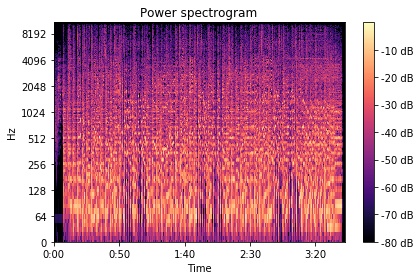

In [56]:
librosa.display.specshow(librosa.amplitude_to_db(D,
                                                 ref=np.max),
                          y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

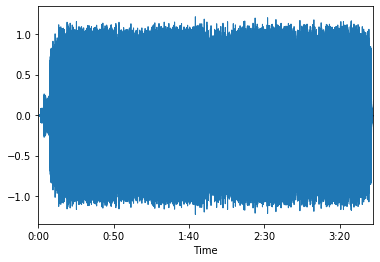

In [58]:
librosa.display.waveplot(y, sr=sr)

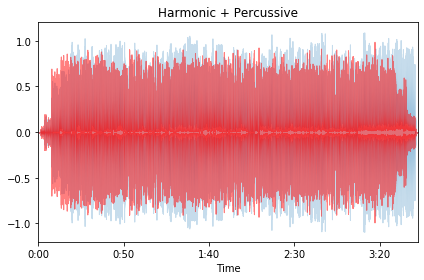

In [57]:
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()
plt.show()

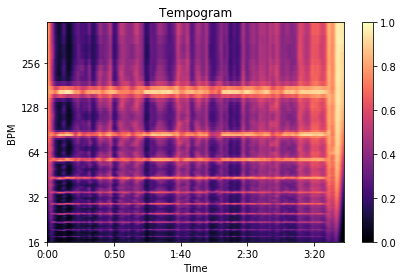

In [59]:
Tgram = librosa.feature.tempogram(y=y, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram')
plt.tight_layout()
plt.show()